### Import necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Heart Failure Clinical Record Dataset

In [2]:
heart_failure_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Let us observe the distribution of the continuous variables

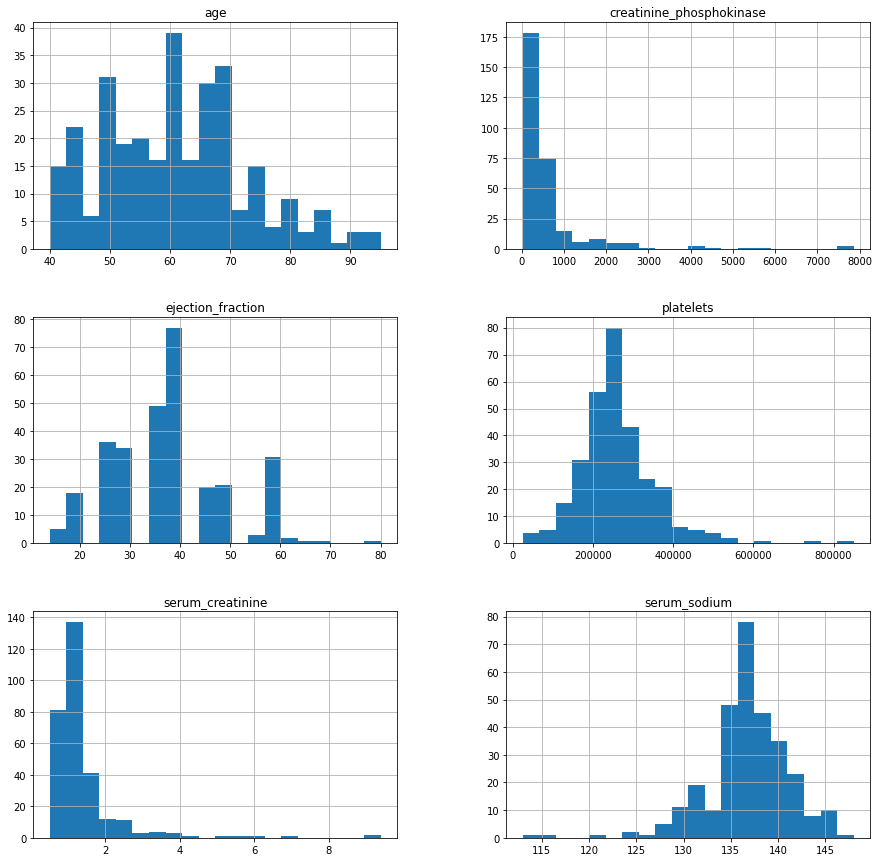

In [5]:
heart_failure_df[['age', 'creatinine_phosphokinase',
                 'ejection_fraction', 'platelets',
                 'serum_creatinine', 
                 'serum_sodium']].hist(bins=20,
                                       figsize=(15, 15))
plt.show()

In [6]:
continous_var = ['age', 'creatinine_phosphokinase',
                'ejection_fraction', 'platelets',
                'serum_creatinine', 'serum_sodium']

heart_failure_df[continous_var].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


<p>Now as we've seen the distribution separately and statistical parameters, it would be nice a idea to see how each of these variables relate to the 'DEATH_EVENT'. Lets replace the 0 and 1 values of this column to 'yes' and 'no' as well as change the 'sex' column values of 0 and 1 with 'male' and 'female'.</p>

In [7]:
heart_failure_df['sex1'] = heart_failure_df['sex'].replace({1: "Male", 0: "Female"})
heart_failure_df['death'] = heart_failure_df['DEATH_EVENT'].replace({1: "yes", 0: "no"})

### Let us observe the relationship between continuous variables

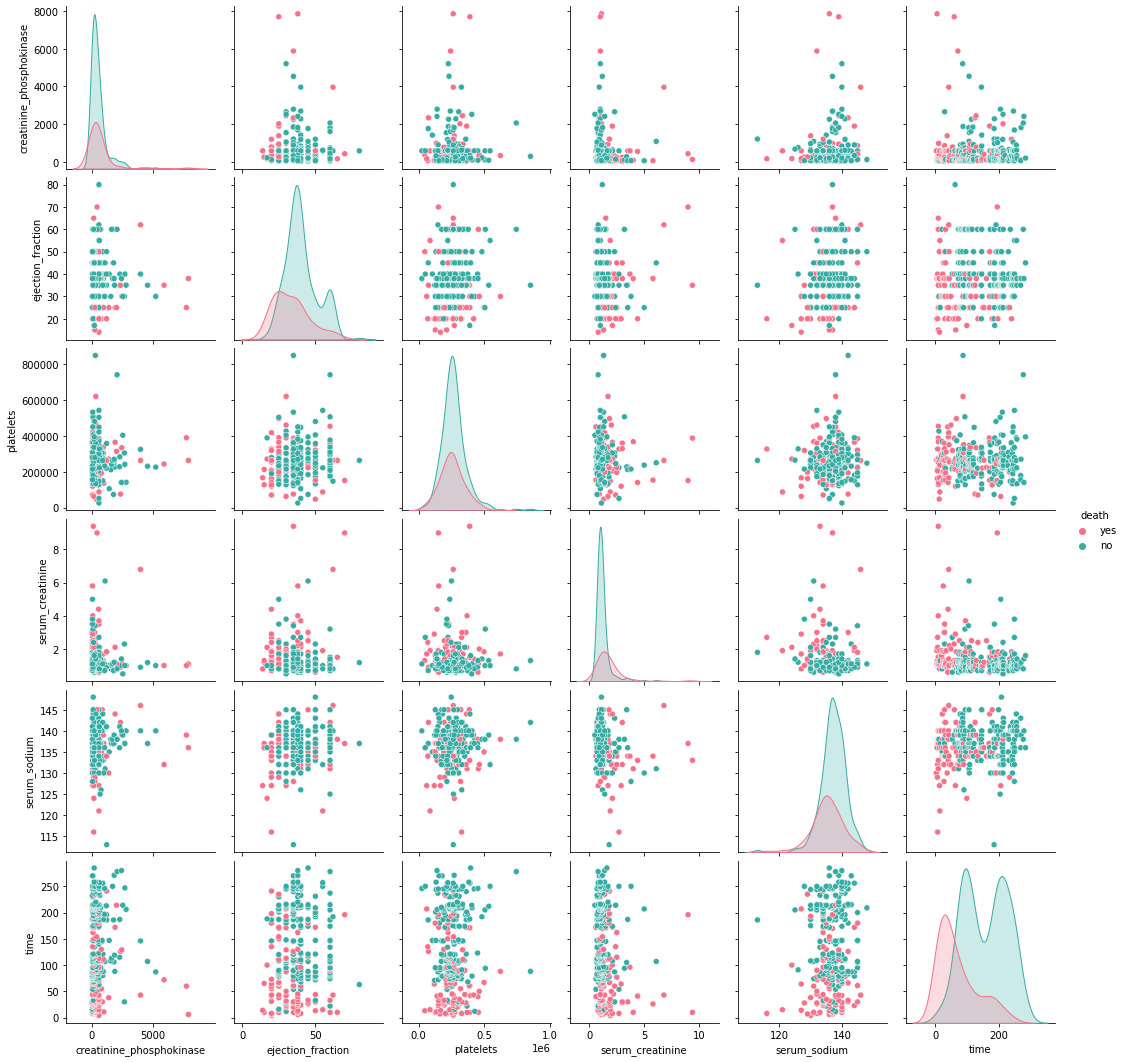

In [10]:
sns.pairplot(heart_failure_df[["creatinine_phosphokinase", 
                               "ejection_fraction", "platelets", 
                               "serum_creatinine","serum_sodium", 
                               "time", "death"]], hue="death",
                                diag_kind="kde",
                                kind="scatter",
                                palette="husl")

plt.show()

<p>In the above plot, the red color represents the death event and the green color represents no death event. As such the plot shows us how each of these variables is segregated between death events. Besides, the scatter plot, the density plot between shows a clear distinction of data for death events and no death events. Boxplots will give us a little more clarity on that.</p>

/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, Use

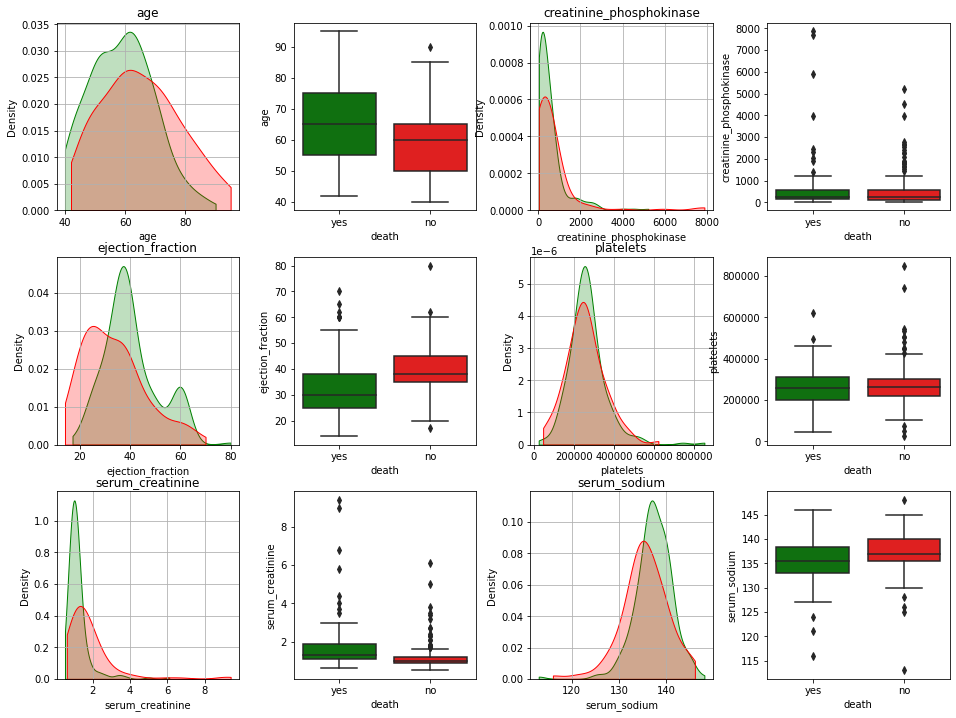

In [14]:
continous_var = ['age', 'creatinine_phosphokinase', 
                 'ejection_fraction', 'platelets', 
                 'serum_creatinine','serum_sodium']

plt.figure(figsize=(16, 25))

for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace=0.25, wspace=0.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(heart_failure_df.loc[heart_failure_df["death"]=='no', col],
                label="alive", color="green", shade=True, kernel='gau',
                cut=0)
    sns.kdeplot(heart_failure_df.loc[heart_failure_df["death"]=='yes', col],
                label="dead", color="red", shade=True, kernel='gau',
                cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = heart_failure_df, x="death", palette = ["green","red"])

<p>Next we will find the mean and median of each continuous variable for death events and no death events. As we saw in the distribution and density plots before, not all the variables are normally distributed. Some are skewed. So, mean alone will not be representative for each one.</p>

In [15]:
y = heart_failure_df.groupby("death")["creatinine_phosphokinase", 
                                      "ejection_fraction", 
                                      "platelets", 
                                      "serum_creatinine", 
                                      "serum_sodium", 
                                      "time"].agg([np.mean, np.median])
y

/Users/jessica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187    245          40.26601     38  266657.489901   
yes                 670.197917    259          33.46875     30  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

<p>Looks like the 'time' variable is very different between the death events. Let's see if high blood pressure plays any role in deaths by gender</p>

In [16]:
heart_failure_df.groupby(['sex1', 'high_blood_pressure', 'death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

death                             no       yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

<p>As we can see from the above observation that in the female population, 28% of deaths happened with no high blood pressure and 39% of deaths happened with high blood pressure. Apparently, a significant difference but not too drastic. Let's explore other five categorical variables in this dataset with help of countplot.</p>

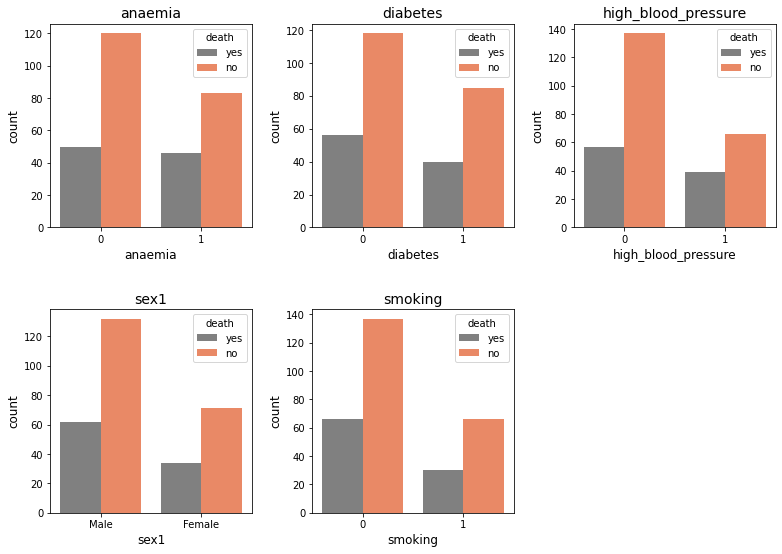

In [17]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex1', 'smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    sns.countplot(data=heart_failure_df, x=var, hue="death", 
                 palette=['gray','coral'])

<p>In the above plot, we can clearly see that there is a difference in the number of death events between different sex(male and female), high_blood_pressure, smoking, and diabetes status. But at the same time, it also shows that the dataset is not balanced in terms of the number of people who smoke and do not smoke or the number of people having diabetes or not, or the number of males and the number of females. At this moment, I can think of taking crosstab between each of these variables and death variable.</p>

In [18]:
x = pd.crosstab(heart_failure_df["sex1"], heart_failure_df["death"])
x

death,no,yes
sex1,,
Female,71,34
Male,132,62


<p>We can see how many deaths happened in the male population versus the female population. But the proportions will be more informative in this case.</p>

In [19]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


<p>The deaths in male and female population both are approximately 32%. So they are almost identical.</p>

In [21]:
x = pd.crosstab(heart_failure_df["anaemia"], heart_failure_df["death"])
x

death,no,yes
anaemia,,
0,120,50
1,83,46


In [22]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589


<p>The proportion of death for people with anemia is bit higher.</p>

In [24]:
x = pd.crosstab(heart_failure_df["diabetes"], heart_failure_df["death"])
x

death,no,yes
diabetes,,
0,118,56
1,85,40


In [25]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
diabetes,,
0,0.678161,0.321839
1,0.680000,0.320000


<p>Here, the proportion of death for people with diabetes and with no diabetes is exactly the same.</p>

In [26]:
x = pd.crosstab(heart_failure_df["smoking"], heart_failure_df["death"])
x

death,no,yes
smoking,,
0,137,66
1,66,30


In [27]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
smoking,,
0,0.674877,0.325123
1,0.687500,0.312500


<p>The proportion of death for people with smoking and with no smoking is exactly the same.</p>

In [28]:
x = pd.crosstab(heart_failure_df["high_blood_pressure"], heart_failure_df["death"])
x

death,no,yes
high_blood_pressure,,
0,137,57
1,66,39


In [29]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
high_blood_pressure,,
0,0.706186,0.293814
1,0.628571,0.371429


<p>Here, the proportion of death is higher in people with high blood pressure.</p>

<p>In all the above analyses, we only tried to determine all the other variable’s relationship with the ‘death’ variable. Next element is a violin plot that shows the distribution of ‘time’ across smoking and no smoking males and females.</p>

/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


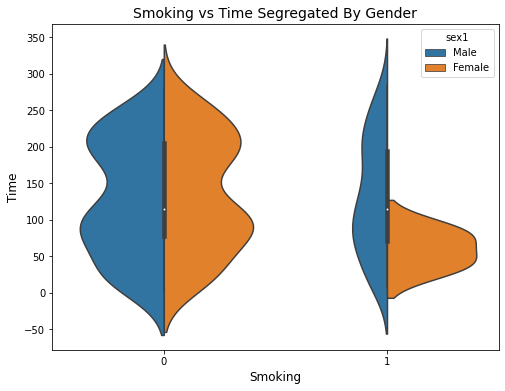

In [30]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(heart_failure_df.smoking, heart_failure_df.time, 
                   hue=heart_failure_df.sex1, split=True)
plt.title("Smoking vs Time Segregated By Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

<p>As we can observe from the above plot that in case of no smoking people, male and females have the same distribution, while on the other hand, in case of smoking people, the distribution for males and females is very different. Most females lie in a narrow range from about 0 to 140. Whereas the male population has a range from -50 to 350.</p>

### Observe the relation between Ejection_fraction and Time segregated by Death

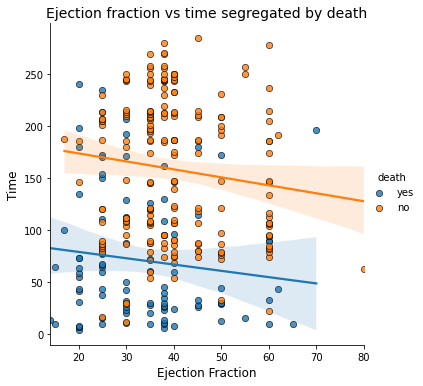

In [31]:
sns.lmplot(x="ejection_fraction", y="time",
          hue="death", data=heart_failure_df,
          scatter_kws=dict(s=40, linewidths=0.7,
                           edgecolors="black"))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", 
          fontsize=14)
plt.show()

<p>From the above plot we can observe the regression line and the confidence band. As expected the confidence band is narrower in the middle where the density of data is higer and wider in the sides where the density of data is lower.</p>

<p>In the next plot, let's see another comparison between the male and female population. How 'time' changes with 'age':</p>

<Figure size 1600x640 with 0 Axes>

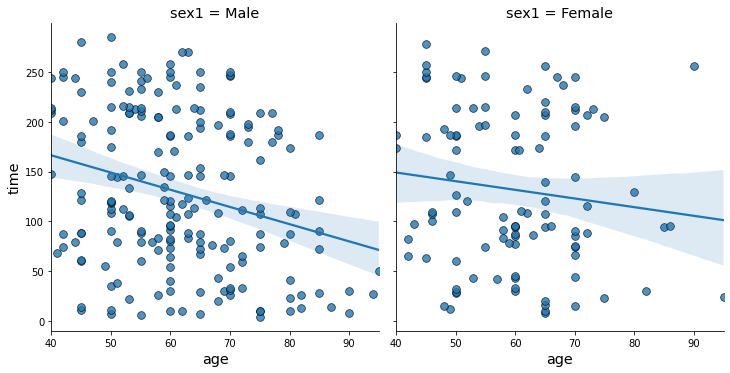

In [40]:
fig = plt.figure(figsize=(20, 8), dpi=80) 
g = sns.lmplot(x='age', y='time',
               data = heart_failure_df,
               palette="Set1", col="sex1", 
               scatter_kws=dict(s=60, linewidths=0.7,edgecolors="black")) 

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), 
                 fontsize='x-large') 
    ax.set_ylabel(ax.get_ylabel(), 
                  fontsize='x-large') 
    ax.set_xlabel(ax.get_xlabel(), 
                  fontsize='x-large')

<p>If we notice the regression line, in case of male population it is much steeper. With 'age', 'time' goes down.</p>

### Let's understand the correlation between the variables - using a heatmap

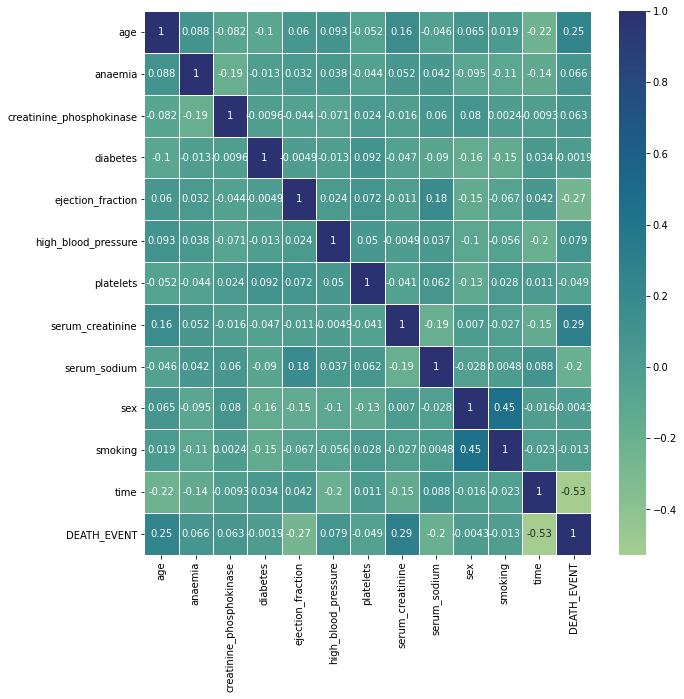

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(heart_failure_df.corr(), annot=True, linewidths=0.5, 
            cmap="crest")
plt.show()